In [1]:
import numpy as np
from scipy import stats
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
import h5py
from keras.callbacks import ModelCheckpoint

import random
import matplotlib.pyplot as plt

from utils import RandomSeedResetter
RandomSeedResetter.reset_random_seed(0)

Using TensorFlow backend.


In [2]:
input_train = np.load('data/chen/input_train.npy')
input_train_shuffle = np.load('data/chen/input_train_shuffle.npy')
input_train_mlp = np.load('data/chen/input_train_mlp.npy')
input_train_mlp_shuffle = np.load('data/chen/input_train_mlp_shuffle.npy')
output_train = np.load('data/chen/output_train.npy')
output_train_shuffle = np.load('data/chen/output_train_shuffle.npy')

input_valid = np.load('data/chen/input_valid.npy')
input_valid_mlp = np.load('data/chen/input_valid_mlp.npy')
output_valid = np.load('data/chen/output_valid.npy')

print('Train : ', input_train_shuffle.shape, output_train_shuffle.shape)
print('Valid : ', input_valid.shape, output_valid.shape)
print('Train of MLP: ', input_train_mlp_shuffle.shape, output_train_shuffle.shape)
print('Valid of MLP: ', input_valid_mlp.shape, output_valid.shape)

Train :  (50000, 225, 32) (50000, 32)
Valid :  (10000, 225, 32) (10000, 32)
Train of MLP:  (50000, 256) (50000, 32)
Valid of MLP:  (10000, 256) (10000, 32)


In [3]:
len_input = len(input_train_shuffle[0, :])
dim_input = len(input_train_shuffle[0, 0, :])
dim_output = len(output_train_shuffle[0, :])

rnn_1 = SimpleRNN(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
rnn_2 = SimpleRNN(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
rnn_3 = SimpleRNN(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

lstm_1 = LSTM(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
lstm_2 = LSTM(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
lstm_3 = LSTM(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

gru_1 = GRU(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
gru_2 = GRU(
        # dim_output
        units=dim_input,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh',
        return_sequences=True)
gru_3 = GRU(
        # dim_output
        units=dim_output,
        # batch_size, length_input, dim_input
        batch_input_shape=(None, len_input, dim_input),
        # activation_function
        activation='tanh')

In [4]:
model_mlp = Sequential()
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(len_input+dim_input-1, activation='relu', input_shape=(len_input+dim_output-1,)))
model_mlp.add(Dropout(0.5))
model_mlp.add(Dense(dim_output, activation='linear'))

model_rnn = Sequential()
model_rnn.add(rnn_1)
model_rnn.add(rnn_2)
model_rnn.add(rnn_3)

model_lstm = Sequential()
model_lstm.add(lstm_1)
model_lstm.add(lstm_2)
model_lstm.add(lstm_3)

model_gru = Sequential()
model_gru.add(gru_1)
model_gru.add(gru_2)
model_gru.add(gru_3)

model_mlp.compile(optimizer='adam',
    loss='mean_squared_error')
model_rnn.compile(optimizer='adam',
    loss='mean_squared_error')
model_lstm.compile(optimizer='adam',
    loss='mean_squared_error')
model_gru.compile(optimizer='adam',
    loss='mean_squared_error')

model_check_mlp = ModelCheckpoint(filepath = 'model/mlp_chen/model_check_mlp.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_rnn = ModelCheckpoint(filepath = 'model/mlp_chen/model_check_rnn.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_lstm = ModelCheckpoint(filepath = 'model/mlp_chen/model_check_lstm.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)
model_check_gru = ModelCheckpoint(filepath = 'model/mlp_chen/model_check_gru.h5',
                                  monitor='val_loss',
                                  verbose=0,
                                  save_best_only=True,
                                  save_weights_only=False,
                                  mode='min',
                                  period=1)

size_epoch = 100
size_batch = 500

In [5]:
history_mlp = model_mlp.fit(
    input_train_mlp_shuffle[:, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid_mlp[:, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_mlp])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.1126 - val_loss: 0.1038
Epoch 2/100
 - 2s - loss: 0.1040 - val_loss: 0.1038
Epoch 3/100
 - 1s - loss: 0.1038 - val_loss: 0.1033
Epoch 4/100
 - 1s - loss: 0.1027 - val_loss: 0.1004
Epoch 5/100
 - 1s - loss: 0.1006 - val_loss: 0.0980
Epoch 6/100
 - 2s - loss: 0.0985 - val_loss: 0.0950
Epoch 7/100
 - 1s - loss: 0.0963 - val_loss: 0.0927
Epoch 8/100
 - 2s - loss: 0.0948 - val_loss: 0.0920
Epoch 9/100
 - 2s - loss: 0.0937 - val_loss: 0.0905
Epoch 10/100
 - 1s - loss: 0.0927 - val_loss: 0.0898
Epoch 11/100
 - 1s - loss: 0.0918 - val_loss: 0.0892
Epoch 12/100
 - 1s - loss: 0.0912 - val_loss: 0.0884
Epoch 13/100
 - 1s - loss: 0.0905 - val_loss: 0.0879
Epoch 14/100
 - 1s - loss: 0.0900 - val_loss: 0.0873
Epoch 15/100
 - 1s - loss: 0.0896 - val_loss: 0.0871
Epoch 16/100
 - 1s - loss: 0.0891 - val_loss: 0.0862
Epoch 17/100
 - 1s - loss: 0.0887 - val_loss: 0.0858
Epoch 18/100
 - 1s - loss: 0.0883 - val_loss: 0.0851
Epoch

In [6]:
history_rnn = model_rnn.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_rnn])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 39s - loss: 0.1533 - val_loss: 0.1071
Epoch 2/100
 - 36s - loss: 0.1034 - val_loss: 0.1011
Epoch 3/100
 - 36s - loss: 0.1000 - val_loss: 0.0993
Epoch 4/100
 - 36s - loss: 0.0985 - val_loss: 0.0979
Epoch 5/100
 - 35s - loss: 0.0975 - val_loss: 0.0971
Epoch 6/100
 - 34s - loss: 0.0969 - val_loss: 0.0967
Epoch 7/100
 - 34s - loss: 0.0963 - val_loss: 0.0962
Epoch 8/100
 - 34s - loss: 0.0959 - val_loss: 0.0959
Epoch 9/100
 - 35s - loss: 0.0955 - val_loss: 0.0953
Epoch 10/100
 - 34s - loss: 0.0951 - val_loss: 0.0951
Epoch 11/100
 - 35s - loss: 0.0946 - val_loss: 0.0942
Epoch 12/100
 - 34s - loss: 0.0939 - val_loss: 0.0934
Epoch 13/100
 - 34s - loss: 0.0926 - val_loss: 0.0918
Epoch 14/100
 - 34s - loss: 0.0904 - val_loss: 0.0890
Epoch 15/100
 - 35s - loss: 0.0880 - val_loss: 0.0866
Epoch 16/100
 - 35s - loss: 0.0860 - val_loss: 0.0847
Epoch 17/100
 - 34s - loss: 0.0839 - val_loss: 0.0828
Epoch 18/100
 - 35s - loss: 0.0819 - val_

In [7]:
history_lstm = model_lstm.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_lstm])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 136s - loss: 0.1030 - val_loss: 0.1023
Epoch 2/100
 - 135s - loss: 0.1020 - val_loss: 0.1014
Epoch 3/100
 - 135s - loss: 0.1007 - val_loss: 0.0998
Epoch 4/100
 - 135s - loss: 0.0984 - val_loss: 0.0963
Epoch 5/100
 - 135s - loss: 0.0947 - val_loss: 0.0926
Epoch 6/100
 - 135s - loss: 0.0890 - val_loss: 0.0842
Epoch 7/100
 - 135s - loss: 0.0804 - val_loss: 0.0762
Epoch 8/100
 - 135s - loss: 0.0737 - val_loss: 0.0721
Epoch 9/100
 - 135s - loss: 0.0697 - val_loss: 0.0688
Epoch 10/100
 - 136s - loss: 0.0667 - val_loss: 0.0656
Epoch 11/100
 - 135s - loss: 0.0647 - val_loss: 0.0635
Epoch 12/100
 - 135s - loss: 0.0628 - val_loss: 0.0622
Epoch 13/100
 - 135s - loss: 0.0616 - val_loss: 0.0607
Epoch 14/100
 - 135s - loss: 0.0603 - val_loss: 0.0591
Epoch 15/100
 - 135s - loss: 0.0589 - val_loss: 0.0586
Epoch 16/100
 - 135s - loss: 0.0583 - val_loss: 0.0584
Epoch 17/100
 - 135s - loss: 0.0569 - val_loss: 0.0562
Epoch 18/100
 - 136s - l

In [8]:
history_gru = model_gru.fit(
    input_train_shuffle[:, :, :],
    output_train_shuffle[:, :],
    validation_data=(input_valid[:, :, :], output_valid[:, :]),
    epochs=size_epoch,
    batch_size=size_batch,
    shuffle=True,
    verbose=2,
    callbacks=[model_check_gru])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 110s - loss: 0.1026 - val_loss: 0.1005
Epoch 2/100
 - 109s - loss: 0.0997 - val_loss: 0.0986
Epoch 3/100
 - 110s - loss: 0.0978 - val_loss: 0.0967
Epoch 4/100
 - 110s - loss: 0.0958 - val_loss: 0.0949
Epoch 5/100
 - 109s - loss: 0.0943 - val_loss: 0.0936
Epoch 6/100
 - 109s - loss: 0.0921 - val_loss: 0.0897
Epoch 7/100
 - 109s - loss: 0.0857 - val_loss: 0.0819
Epoch 8/100
 - 109s - loss: 0.0784 - val_loss: 0.0747
Epoch 9/100
 - 109s - loss: 0.0726 - val_loss: 0.0707
Epoch 10/100
 - 109s - loss: 0.0699 - val_loss: 0.0686
Epoch 11/100
 - 109s - loss: 0.0680 - val_loss: 0.0671
Epoch 12/100
 - 109s - loss: 0.0668 - val_loss: 0.0662
Epoch 13/100
 - 109s - loss: 0.0652 - val_loss: 0.0644
Epoch 14/100
 - 109s - loss: 0.0640 - val_loss: 0.0631
Epoch 15/100
 - 109s - loss: 0.0628 - val_loss: 0.0624
Epoch 16/100
 - 109s - loss: 0.0617 - val_loss: 0.0612
Epoch 17/100
 - 109s - loss: 0.0606 - val_loss: 0.0601
Epoch 18/100
 - 109s - l

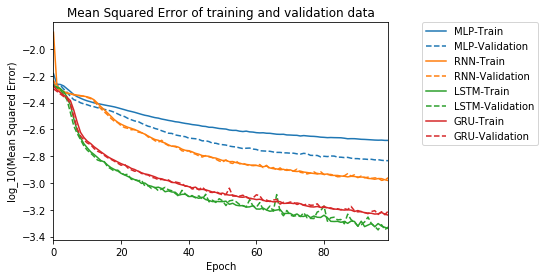

In [9]:
# Plot training & validation loss values
plt.figure()
plt.title('Mean Squared Error of training and validation data')

plt.ylabel('log_10(Mean Squared Error)')
plt.xlabel('Epoch')

plt.plot(np.log(history_mlp.history['loss']), label='MLP-Train', color = 'tab:blue')
plt.plot(np.log(history_mlp.history['val_loss']), label='MLP-Validation', color = 'tab:blue', linestyle='dashed')
plt.plot(np.log(history_rnn.history['loss']), label='RNN-Train', color = 'tab:orange')
plt.plot(np.log(history_rnn.history['val_loss']), label='RNN-Validation', color = 'tab:orange', linestyle='dashed')
plt.plot(np.log(history_lstm.history['loss']), label='LSTM-Train', color = 'tab:green')
plt.plot(np.log(history_lstm.history['val_loss']), label='LSTM-Validation', color = 'tab:green', linestyle='dashed')
plt.plot(np.log(history_gru.history['loss']), label='GRU-Train', color = 'tab:red')
plt.plot(np.log(history_gru.history['val_loss']), label='GRU-Validation', color = 'tab:red', linestyle='dashed')

plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0)
plt.xlim(0, size_epoch-1)
plt.show()

In [10]:
import json

with open('model/mlp_chen/history_mlp.json', 'w') as f:
    json.dump(history_mlp.history, f)
with open('model/mlp_chen/history_rnn.json', 'w') as f:
    json.dump(history_rnn.history, f)
with open('model/mlp_chen/history_lstm.json', 'w') as f:
    json.dump(history_lstm.history, f)
with open('model/mlp_chen/history_gru.json', 'w') as f:
    json.dump(history_gru.history, f)